<a href="https://colab.research.google.com/github/SparshRastogi/Stock-Market-Assistant-Bot/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr

In [ ]:
company = input('Enter company name: ')

Enter company name: Aapl


In [ ]:
df = pdr.get_data_tiingo(company, api_key ='074deba77b28710c27bc34818a008f0c1945f238')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
Aapl   2017-02-27 00:00:00+00:00  136.93  137.4350  ...      0.0          1.0
       2017-02-28 00:00:00+00:00  136.99  137.4350  ...      0.0          1.0
       2017-03-01 00:00:00+00:00  139.79  140.1500  ...      0.0          1.0
       2017-03-02 00:00:00+00:00  138.96  140.2786  ...      0.0          1.0
       2017-03-03 00:00:00+00:00  139.78  139.8300  ...      0.0          1.0
...                                  ...       ...  ...      ...          ...
       2022-02-16 00:00:00+00:00  172.55  173.3400  ...      0.0          1.0
       2022-02-17 00:00:00+00:00  168.88  171.9100  ...      0.0          1.0
       2022-02-18 00:00:00+00:00  167.30  170.5413  ...      0.0          1.0
       2022-02-22 00:00:00+00:00  164.32  166.6900  ...      0.0          1.0
       2022-02-23 00:00:00+00:00  160.07  166.1500  ...      0.0          1.0

[1258 rows x 12 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df.to_csv(f'/content/drive/MyDrive/{company}.csv')

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1

0       136.93
1       136.99
2       139.79
3       138.96
4       139.78
         ...  
1253    172.55
1254    168.88
1255    167.30
1256    164.32
1257    160.07
Name: close, Length: 1258, dtype: float64

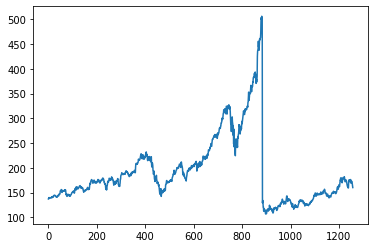

In [ ]:
plt.plot(df1)

In [ ]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.07536631],
       [0.07551659],
       [0.08252974],
       ...,
       [0.15143394],
       [0.14396994],
       [0.13332498]])

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data

array([[0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.099

In [ ]:
test_data

array([[9.82993112e-01],
       [1.00000000e+00],
       [9.84846587e-01],
       [9.82817783e-01],
       [5.56042580e-02],
       [6.84783970e-02],
       [6.15153413e-02],
       [3.51659361e-02],
       [3.53663118e-02],
       [1.49780839e-02],
       [2.62492173e-02],
       [1.66562304e-02],
       [1.29242329e-02],
       [2.13274890e-02],
       [2.17908579e-02],
       [1.32498435e-02],
       [8.76643707e-03],
       [0.00000000e+00],
       [8.11521603e-03],
       [1.24483406e-02],
       [7.01314966e-04],
       [3.45648090e-03],
       [1.36255479e-02],
       [2.03381340e-02],
       [1.81590482e-02],
       [2.24671259e-02],
       [2.49217282e-02],
       [1.54790232e-02],
       [2.41953663e-02],
       [1.58296807e-02],
       [2.06386976e-02],
       [2.03631810e-02],
       [2.53725736e-02],
       [4.39824671e-02],
       [3.57169693e-02],
       [3.59423920e-02],
       [3.47401378e-02],
       [3.05072010e-02],
       [2.28929242e-02],
       [2.67251096e-02],


In [ ]:
timespan = 5
timespan = int(input('Enter time span in days: '))

Enter time span in days: 100


In [ ]:
def create_dataset (dataset, span=timespan):
    x,y= [], []
    for i in range (len (dataset)-span-1):
        a = dataset[i: (i+span), 0] ###=0, 0,1,2,3---1-99 |
        x.append(a)
        y.append(dataset[i+ span, 0])
    return np.array(x), np.array(y)

In [ ]:
x_train, y_train = create_dataset (train_data, timespan)
x_test, y_test= create_dataset (test_data, timespan)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1) 
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timespan,1)))
model.add (LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add (Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 288ms/step - loss: 0.0263 - val_loss: 0.0017
Epoch 2/100
13/13 [==============================] - 2s 178ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 3/100
13/13 [==============================] - 2s 176ms/step - loss: 0.0017 - val_loss: 3.0024e-04
Epoch 4/100
13/13 [==============================] - 2s 182ms/step - loss: 0.0015 - val_loss: 3.4431e-04
Epoch 5/100
13/13 [==============================] - 2s 180ms/step - loss: 0.0015 - val_loss: 3.4595e-04
Epoch 6/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0014 - val_loss: 2.6911e-04
Epoch 7/100
13/13 [==============================] - 2s 177ms/step - loss: 0.0011 - val_loss: 2.6297e-04
Epoch 8/100
13/13 [==============================] - 2s 179ms/step - loss: 0.0010 - val_loss: 3.0069e-04
Epoch 9/100
13/13 [==============================] - 2s 178ms/step - loss: 0.0012 - val_loss: 3.6005e-04
Epoch 10/100
13/13 [==============================] - 2s 187ms/

In [ ]:
train_predict=model.predict(x_train) 
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
mean_squared_error(y_train, train_predict,squared= False)

229.12005367598866

In [ ]:
mean_squared_error(y_test, test_predict,squared  = False)

146.54060077964144

In [ ]:
l = len(test_data)

In [ ]:
x_input=test_data[l - timespan:].reshape (1,-1)
x_input.shape

(1, 100)

In [ ]:
x_input

array([[0.08969317, 0.08090169, 0.08583594, 0.08806512, 0.09129618,
        0.09031935, 0.09009393, 0.08683782, 0.085335  , 0.09247339,
        0.09517846, 0.09946149, 0.10499687, 0.10624922, 0.10680025,
        0.10482154, 0.10469631, 0.1063995 , 0.10522229, 0.11453976,
        0.10760175, 0.10549781, 0.10815279, 0.11183469, 0.1105072 ,
        0.1113087 , 0.10920476, 0.1101315 , 0.10289292, 0.10276769,
        0.10807765, 0.10810269, 0.11060739, 0.11684408, 0.12781465,
        0.13452724, 0.13570445, 0.13668128, 0.13800877, 0.12515967,
        0.13375078, 0.14642455, 0.14509706, 0.14256731, 0.1377583 ,
        0.14647464, 0.16115216, 0.17092048, 0.16961803, 0.181866  ,
        0.17257358, 0.16904195, 0.18149029, 0.16385723, 0.16105197,
        0.15757044, 0.16568566, 0.17232311, 0.17392611, 0.18407013,
        0.18146525, 0.18169067, 0.17873513, 0.17715717, 0.18827802,
        0.18249217, 0.17051972, 0.16320601, 0.16363181, 0.1636819 ,
        0.17092048, 0.17204759, 0.1636819 , 0.16

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.13668127739511576,
 0.13800876643706944,
 0.12515967438948022,
 0.1337507827175955,
 0.14642454602379462,
 0.14509705698184094,
 0.14256731371321218,
 0.1377582968065122,
 0.14647463994

In [ ]:
output = []

In [ ]:
lst_output= []
n_steps = timespan 
i=1
while(i<=30):
   if(len (temp_input) > timespan):
       x_input=np.array(temp_input[1:])
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend (yhat[0].tolist()) 
       temp_input=temp_input[1:] 
      # j = scaler.inverse_transform(yhat)
      # print('Value',j)
      # output.append(j)
 #print(temp_input)
       lst_output.extend(yhat.tolist())
       i+=1
   else:
       x_input = x_input.reshape((1, n_steps,1)) 
       yhat = model.predict(x_input, verbose=0) 
       print (yhat[0]) 
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input)) 
       lst_output.extend(yhat.tolist())
       i=i+1
   #output.append(scaler.inverse_transform(yhat))

print(lst_output)

[0.15337375]
101
2 day input [0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0

In [ ]:
output = scaler.inverse_transform(lst_output[1:])

In [ ]:
output

array([[0.9698875 ],
       [1.05961323],
       [1.15387118],
       [1.24455428],
       [1.32727408],
       [1.40117002],
       [1.46832013],
       [1.53230715],
       [1.59657431],
       [1.66317499],
       [1.73229551],
       [1.80255544],
       [1.8717984 ],
       [1.93795538],
       [1.99962711],
       [2.05626464],
       [2.10802984],
       [2.15550852],
       [2.19942474],
       [2.24044347],
       [2.27907896],
       [2.31568074],
       [2.35046005],
       [2.38353634],
       [2.41497254],
       [2.44480991],
       [2.47307611],
       [2.49980307],
       [2.52502203]])

In [ ]:
output

array([[2.5487685]], dtype=float32)

In [ ]:

lst_output = lst_output.reshape(-1,1)
output = scaler.inverse_transform(lst_output)

AttributeError: ignored

In [ ]:
day_new=np.arange(1,timespan + 1) 
day_pred=np.arange (timespan + 1,timespan + 31)

In [ ]:
df3=df1.tolist() 
df3.extend(lst_output)

In [ ]:
len(df1)

1258

In [ ]:
df3

[[0.07536631183469],
 [0.07551659361302443],
 [0.08252974326862861],
 [0.08045084533500313],
 [0.08250469630557289],
 [0.0814026299311208],
 [0.08185347526612397],
 [0.080551033187226],
 [0.07974953036944266],
 [0.08090169067000619],
 [0.08105197244834056],
 [0.08052598622417029],
 [0.08420788979336252],
 [0.08478396994364429],
 [0.08303068252974327],
 [0.0867125860989355],
 [0.08265497808390732],
 [0.08661239824671252],
 [0.08536005009392605],
 [0.08465873512836564],
 [0.08525986224170312],
 [0.09257357545397621],
 [0.0933750782717595],
 [0.09289918597370067],
 [0.09222291797119592],
 [0.09232310582341885],
 [0.09500313087038192],
 [0.09312460864120226],
 [0.09222291797119592],
 [0.09142141515341262],
 [0.09099561678146517],
 [0.08713838447088285],
 [0.0875641828428303],
 [0.08568566061365057],
 [0.08763932373199751],
 [0.08606136505948647],
 [0.08475892298058857],
 [0.08916718847839694],
 [0.0887413901064496],
 [0.09217282404508448],
 [0.09440200375704444],
 [0.09227301189730741],
 [

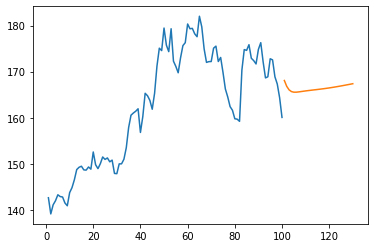

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))